# Imports

In [1]:

!pip install scikit-optimize
import time
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
from sklearn.model_selection import cross_val_score,GridSearchCV, cross_validate
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt  # visualisation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate
import time
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.7 MB/s eta 0:00:00


# Leer archivo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/wind_ava.csv'
df = pd.read_csv(file_path)
df.head(5)

Mounted at /content/drive


,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


# EDA

## Análisis de atributos e instancias



In [3]:
num_instances, num_features = df.shape
print("Number of instances: ", num_instances)
print("Number of features: ", num_features)

Number of instances:  4748
Number of features:  552


## Análisis de cada atributo
Esto es un análisi

In [4]:
variable_types = df.dtypes
columns = df.columns
missing_values = df.isnull().sum()
print("Tipos de variables:")
for i in range(len(variable_types)):
    if variable_types[i] in ['float64', 'int64']:
        print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
    else:
        print(columns[i], ": ", variable_types[i], "-> categórico. || Missing values: ", missing_values[i])

Tipos de variables:
datetime :  object -> categórico. || Missing values:  0
energy :  float64 -> numérico. || Missing values:  0
p54.162.1 :  float64 -> numérico. || Missing values:  0
p54.162.2 :  float64 -> numérico. || Missing values:  0
p54.162.3 :  float64 -> numérico. || Missing values:  0
p54.162.4 :  float64 -> numérico. || Missing values:  0
p54.162.5 :  float64 -> numérico. || Missing values:  0
p54.162.6 :  float64 -> numérico. || Missing values:  0
p54.162.7 :  float64 -> numérico. || Missing values:  0
p54.162.8 :  float64 -> numérico. || Missing values:  0
p54.162.9 :  float64 -> numérico. || Missing values:  0
p54.162.10 :  float64 -> numérico. || Missing values:  0
p54.162.11 :  float64 -> numérico. || Missing values:  0
p54.162.12 :  float64 -> numérico. || Missing values:  0
p54.162.13 :  float64 -> numérico. || Missing values:  0
p54.162.14 :  float64 -> numérico. || Missing values:  0
p54.162.15 :  float64 -> numérico. || Missing values:  0
p54.162.16 :  float64 -> 

## Atributos duplicados, vacíos y constantes

In [5]:
# Mostrar columnas con valores faltantes
print("Columnas con valores faltantes:")
if missing_values.sum() == 0:
    print("No hay columnas con valores faltantes")
else:
    for col in columns:
        if missing_values[col] > 0:
            print(col, ": ", missing_values[col])

# Columnas constantes
constant_columns = df.columns[df.nunique() == 1]
print("Columnas constantes:")
if len(constant_columns) == 0:
    print("No hay columnas constantes")
else:
    for col in constant_columns:
        print(col)

# Filas duplicadas
duplicated_rows = df.duplicated()
print("Filas duplicadas: ", duplicated_rows.sum())

# Filas vacías
empty_rows = df.isnull().all(axis=1)
print("Filas vacías: ", empty_rows.sum())

Columnas con valores faltantes:
No hay columnas con valores faltantes
Columnas constantes:
No hay columnas constantes
Filas duplicadas:  0
Filas vacías:  0


## Naturaleza del problema

In [6]:
problem_type = "Problema de Regresión" if df['energy'].dtype in ['float64', 'int64'] else "Problema de Clasificación"
print(f"Naturaleza del problema: {problem_type}")

Naturaleza del problema: Problema de Regresión


## Selección de columnas relevantes

In [7]:
# Eliminación de variables meteorológicas no correspondientes a la localización 13
print("Columnas relevantes:")
relevant_columns = [col for col in df.columns if col.endswith(".13") or col in ['datetime', 'energy']]
df_relevant = df[relevant_columns]
print("Número de columnas relevantes: ", len(df_relevant.columns))

Columnas relevantes:
Número de columnas relevantes:  24


## Análisis de la variable objetivo

In [8]:
maximo = df_relevant['energy'].max()
minimo = df_relevant['energy'].min()
promedio = df_relevant['energy'].mean()

print("Máximo de la columna 'energía':", maximo)
print("Mínimo de la columna 'energía':", minimo)
print("Promedio de la columna 'energía':", promedio)

Máximo de la columna 'energía': 2792.55
Mínimo de la columna 'energía': 0.01
Promedio de la columna 'energía': 693.126246840775


In [9]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

## Conversión de tiempo en formato fecha

In [10]:
df_relevant['datetime'] = pd.to_datetime(df_relevant['datetime'])

df_relevant['year'] = df_relevant['datetime'].dt.year
df_relevant['month'] = df_relevant['datetime'].dt.month
df_relevant['day'] = df_relevant['datetime'].dt.day
df_relevant['hour'] = df_relevant['datetime'].dt.hour

<ipython-input-10-b94aea1edf21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['datetime'] = pd.to_datetime(df_relevant['datetime'])
<ipython-input-10-b94aea1edf21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['year'] = df_relevant['datetime'].dt.year
<ipython-input-10-b94aea1edf21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

## Días sin mediciones

In [11]:
# Find the range of dates
min_date = df_relevant['datetime'].min()
max_date = df_relevant['datetime'].max()

# Extract unique dates from the datetime column
unique_dates_with_measurements = df_relevant['datetime'].dt.date.unique()

# Generate a range of dates within the specified range
date_range = pd.date_range(min_date, max_date, freq='D')

# Identify the missing dates
missing_dates = set(date_range.date) - set(unique_dates_with_measurements)

# Convert missing dates to DataFrame
missing_dates_df = pd.DataFrame({'missing_dates': list(missing_dates)})

# Sort the DataFrame by 'missing_dates' column
missing_dates_df['missing_dates'] = pd.to_datetime(missing_dates_df['missing_dates'])
missing_dates_df = missing_dates_df.sort_values(by='missing_dates')

# Display the missing dates
print("Days with no measurements:")
print(missing_dates_df.to_string(index=False))
print("Total: ", len(missing_dates_df))

Days with no measurements:
missing_dates
   2005-06-12
   2005-06-19
   2005-12-22
   2006-01-21
   2006-01-22
   2006-11-11
   2006-12-24
   2007-02-05
   2007-03-12
   2007-03-13
   2007-03-14
   2007-03-15
   2007-03-16
   2007-03-17
   2007-03-18
   2007-03-19
   2007-03-20
   2007-03-21
   2007-03-22
   2007-03-23
   2007-03-24
   2007-03-25
   2007-03-26
   2007-03-27
   2007-03-28
   2007-03-29
   2007-03-30
   2007-03-31
   2007-04-01
   2007-04-02
   2007-04-03
   2007-09-26
   2007-09-27
   2007-10-08
   2007-12-15
   2007-12-30
   2008-02-10
   2008-02-11
   2008-02-26
   2008-02-27
   2008-02-28
   2008-02-29
   2008-03-01
   2008-03-02
   2008-03-03
   2008-03-04
   2008-03-05
   2008-03-06
   2008-03-07
   2008-03-08
   2008-03-09
   2008-03-10
   2008-03-11
   2008-03-12
   2008-03-13
   2008-03-14
   2008-03-15
   2008-03-16
   2008-03-17
   2008-03-18
   2008-03-19
   2008-03-20
   2008-03-21
   2008-03-22
   2008-03-23
   2008-03-24
   2008-03-25
   2008-03-26
   2008

## Meses sin mediciones

In [12]:
# Find the range of months
min_month = df_relevant['datetime'].min().to_period('M')
max_month = df_relevant['datetime'].max().to_period('M')

# Extract unique months from the datetime column
unique_months_with_measurements = df_relevant['datetime'].dt.to_period('M').unique()

# Generate a range of months within the specified range
month_range = pd.period_range(min_month, max_month, freq='M')

# Identify the missing months
missing_months = set(month_range) - set(unique_months_with_measurements)

# Convert missing months to DataFrame
missing_months_df = pd.DataFrame({'missing_months': list(missing_months)})

# Sort the DataFrame by 'missing_months' column
missing_months_df = missing_months_df.sort_values(by='missing_months')

# Display the missing months
print("Months with no measurements:")
print(missing_months_df.to_string(index=False))
print("Total: ", len(missing_months_df))

Months with no measurements:
missing_months
       2008-03
       2008-04
       2008-05
       2008-06
       2008-07
       2008-08
       2008-09
       2008-10
       2008-11
       2008-12
       2009-01
       2009-02
Total:  12


## Gráficos

### Días sin mediciones - Raw data



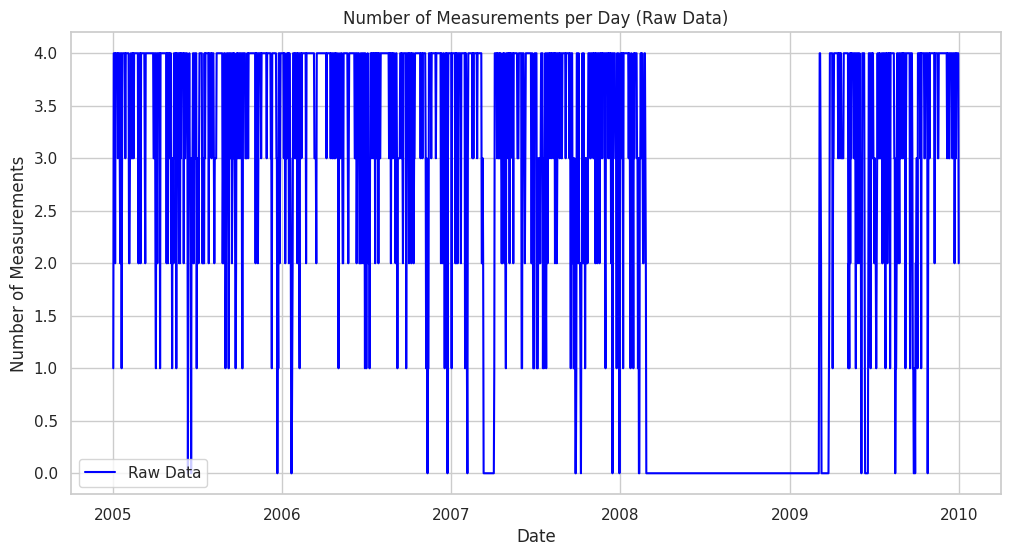

In [13]:
sns.set(color_codes=True)
sns.set(style="whitegrid")
measurements_per_day = df_relevant.groupby(df_relevant['datetime'].dt.date).size().reset_index(name='measurement_count')
# Create a continuous date range spanning the entire period
full_date_range = pd.date_range(start=measurements_per_day['datetime'].min(), end=measurements_per_day['datetime'].max(), freq='D')

# Convert the "datetime" column in the original DataFrame to datetime data type
measurements_per_day['datetime'] = pd.to_datetime(measurements_per_day['datetime'])

# Merge with the actual data and fill missing values with 0
measurements_per_day = pd.DataFrame({'datetime': full_date_range}).merge(measurements_per_day, on='datetime', how='left').fillna(0)

# Plot the raw data
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count', data=measurements_per_day, color='blue', label='Raw Data')

# Adding labels and title
plt.title('Number of Measurements per Day (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Días sin mediciones - Smoothed data


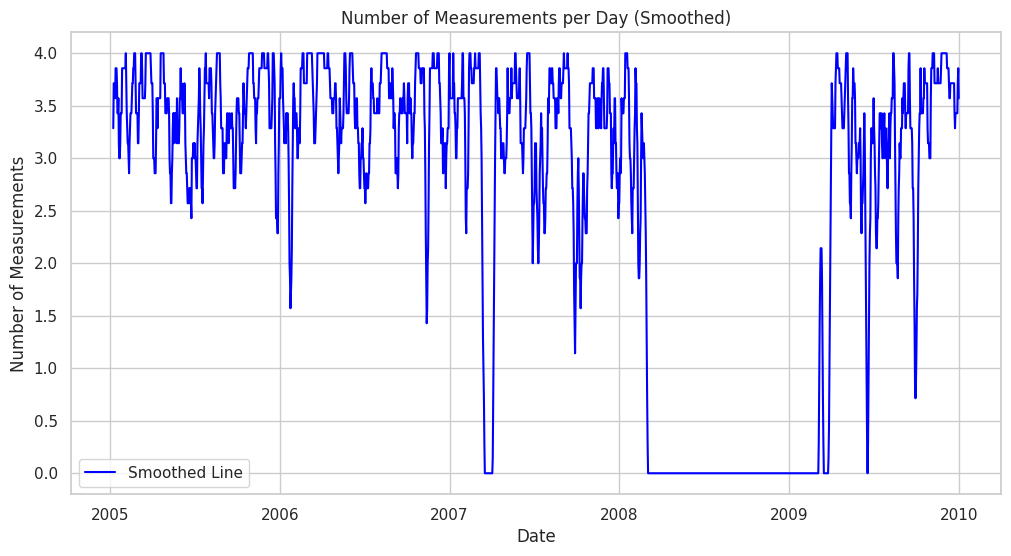

In [14]:
# Smooth the data with a rolling average
window_size = 7  # You can adjust the window size based on your preference
measurements_per_day['measurement_count_smoothed'] = measurements_per_day['measurement_count'].rolling(window=window_size).mean()

# Plot the smoothed line using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count_smoothed', data=measurements_per_day, color='blue', label='Smoothed Line')

# Adding labels and title
plt.title('Number of Measurements per Day (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Evolución de la energía en el tiempo

<ipython-input-15-25d0483b57f6>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


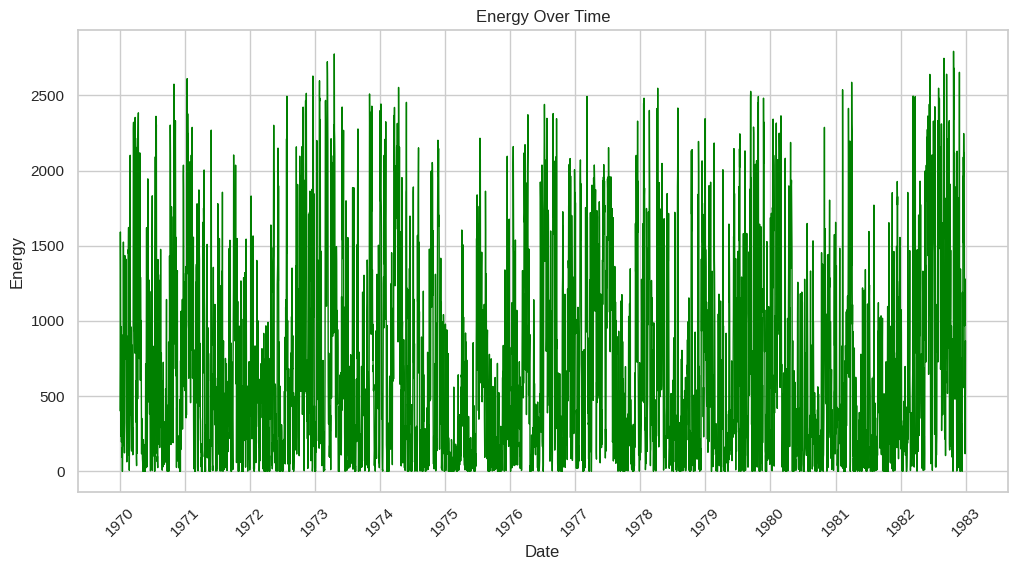

In [15]:
import matplotlib.dates as mdates

# Plotting the energy over time with each day on the x-axis and yearly ticks
plt.figure(figsize=(12, 6))
plt.plot(df_relevant.index, df_relevant['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.grid(True)

# Set the x-axis ticks to display only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()




### Evolución de la energía durante un año (2017)
Se calcula la media de energía para cada día para mostrar un gráfico más suave y comprensible

<ipython-input-16-5446a20db8d4>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


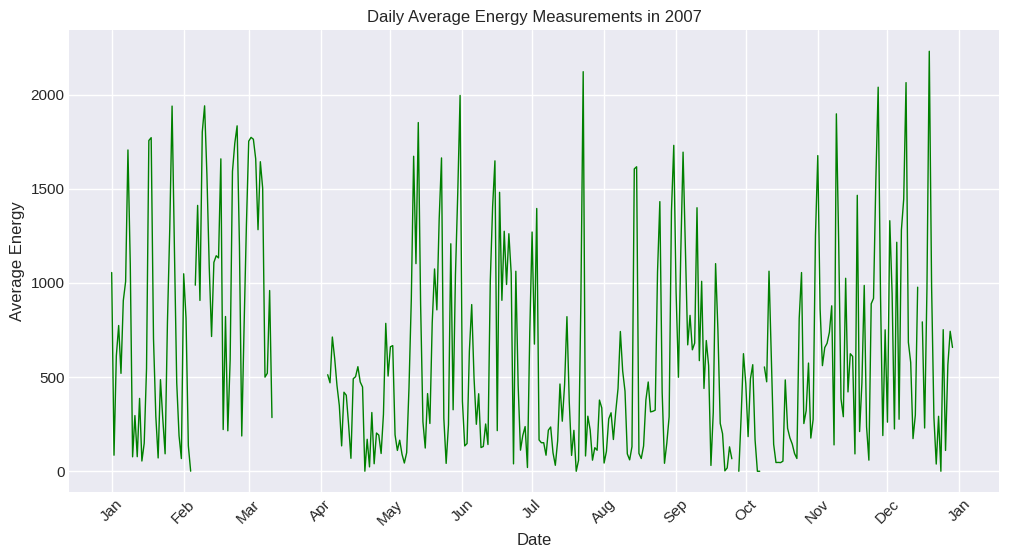

In [16]:
# Filter the data for the year 2007
df_2007 = df_relevant[df_relevant['year'] == 2007]

# Set 'datetime' column as index
df_2007.set_index('datetime', inplace=True)

# Resample the data to get the daily average energy measurement for each day of the year
df_2007_daily_avg = df_2007.resample('D').mean()

# Plotting the daily average energy over time
plt.figure(figsize=(12, 6))
plt.plot(df_2007_daily_avg.index, df_2007_daily_avg['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Daily Average Energy Measurements in 2007')
plt.xlabel('Date')
plt.ylabel('Average Energy')
plt.grid(True)

# Set the x-axis ticks to display only the months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()


### Preparar datos para entrenamiento



In [17]:
# Filter the DataFrame where 'year' is equal to 2018
filtered_df_2008 = df_relevant[df_relevant['year'] == 2008]

# Find the highest index of the filtered DataFrame
highest_index_2008 = filtered_df_2008.index.max()

print("Highest index of an element with 'year' equal to 2008:", highest_index_2008)

# Filter the DataFrame where 'year' is equal to 2009
filtered_df = df_relevant[df_relevant['year'] == 2009]

# Find the first index of the filtered DataFrame
first_index_2009 = filtered_df.index.min()

print("First index of an element with 'year' equal to 200:", first_index_2009)


Highest index of an element with 'year' equal to 2008: 3826
First index of an element with 'year' equal to 200: 3827


In [18]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
df_relevant = df_relevant.drop(columns=['datetime', 'year', 'month', 'day', 'hour'])

# Splitting indices
train_index_end = 3826
test_index_start = 3827

# Splitting data
X,y = df_relevant.drop(columns=['energy']),df_relevant['energy']
X_train, X_test = X.iloc[:train_index_end + 1], X.iloc[test_index_start:]
y_train, y_test = y.iloc[:train_index_end + 1], y.iloc[test_index_start:]

# Sanity check
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3827, 22)
y_train shape: (3827,)
X_test shape: (921, 22)
y_test shape: (921,)


# Evaluación *outer*, *inner* y métrica
Debido a que nos encontramos frente a una serie temporal, hemos decidido usar TimeSeriesSplit para llevar a cabo la inner evaluation.
Para el outer, haremos una división de los datos en train y test cuidando de que esos datos no sean los que están vacíos entre 2008 y 2009.
La evaluación outer se utiliza para estimar el rendimiento futuro del modelo en datos no vistos, mientras que la inner se enfoca en el ajuste de hiperparámetros y la comparación de modelos.

La métrica que se va a usar es el rmse ya que nos parece la métrica más fácil de interpretar al estar en las mismas unidades que la variable objetivo.
Por otra parte, para el problema de clasificación, usaremos f1 score.

# Selección de escalador


In [19]:
# Initialize dictionaries to store scores
scores = {}

# MinMaxScaler
pipeline_min_max = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])
pipeline_min_max.fit(X_train, y_train)
y_pred_min_max = pipeline_min_max.predict(X_test)
rmse_min_max = np.sqrt(mean_squared_error(y_test, y_pred_min_max))
scores["MinMaxScaler"] = rmse_min_max

# StandardScaler
pipeline_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])
pipeline_standard.fit(X_train, y_train)
y_pred_standard = pipeline_standard.predict(X_test)
rmse_standard = np.sqrt(mean_squared_error(y_test, y_pred_standard))
scores["StandardScaler"] = rmse_standard

# RobustScaler
pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])
pipeline_robust.fit(X_train, y_train)
y_pred_robust = pipeline_robust.predict(X_test)
rmse_robust = np.sqrt(mean_squared_error(y_test, y_pred_robust))
scores["RobustScaler"] = rmse_robust

# Print results
print("RMSE for MinMaxScaler:", scores["MinMaxScaler"])
print("RMSE for StandardScaler:", scores["StandardScaler"])
print("RMSE for RobustScaler:", scores["RobustScaler"])

RMSE for MinMaxScaler: 474.0920267183527
RMSE for StandardScaler: 434.509641696542
RMSE for RobustScaler: 436.20372965497177


La media más baja para el rmse es la del StandardScaler por lo que usaremos ese escalador cuando
usemos KNN regressor.


# Modelos

## Hiperparámetros por omisión


### KNN

In [20]:
# Define a pipeline with StandardScaler and KNeighborsRegressor
pipeline_KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Fit the pipeline on the training data
pipeline_KNN.fit(X_train, y_train)

# Make predictions on the test set
y_pred_KNN = pipeline_KNN.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_KNN))

print("Root Mean Squared Error for KNN with StandardScaler (without HPO):", rmse_KNN)

Root Mean Squared Error for KNN with StandardScaler (without HPO): 434.509641696542


### Decission Tree

In [21]:
pipeline_Dec_tree = Pipeline([
    ('decision_tree', DecisionTreeRegressor())
])

# Entrena el modelo en los datos de entrenamiento
pipeline_Dec_tree.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_Dec_tree = pipeline_Dec_tree.predict(X_test)

# Calcula el RMSE
rmse_Dec_tree = np.sqrt(mean_squared_error(y_test, y_pred_Dec_tree))

print("Root Mean Squared Error para Decision Tree (sin HPO):", rmse_Dec_tree)

Root Mean Squared Error para Decision Tree (sin HPO): 522.2400452256052


### Regresión lineal (normal)

In [22]:
pipeline_lRegr = Pipeline([
    ('linear_regression', LinearRegression())  # Modelo de regresión lineal
])

# Entrena el modelo en los datos de entrenamiento
pipeline_lRegr.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_lRegr = pipeline_lRegr.predict(X_test)

# Calcula el RMSE
rmse_lRegr = np.sqrt(mean_squared_error(y_test, y_pred_lRegr))

print("Root Mean Squared Error para Linear Regression (sin HPO):", rmse_lRegr)

Root Mean Squared Error para Linear Regression (sin HPO): 551.5411322398418


### Regresión lineal (variante Lasso)

In [23]:
from sklearn.linear_model import Lasso
pipeline_lasso = Pipeline([
    ('lasso', Lasso())  # Modelo de regresión Lasso
])

# Entrena el modelo en los datos de entrenamiento
pipeline_lasso.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_lasso = pipeline_lasso.predict(X_test)

# Calcula el RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Root Mean Squared Error para Lasso Regression (sin HPO):", rmse_lasso)

Root Mean Squared Error para Lasso Regression (sin HPO): 568.1352256102186


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.985e+08, tolerance: 1.693e+05
  model = cd_fast.enet_coordinate_descent(


### Regresión lineal (variante Ridge)

In [24]:
from sklearn.linear_model import Ridge
pipeline_ridge = Pipeline([
    ('ridge', Ridge())  # Modelo de regresión Ridge
])

# Entrena el modelo en los datos de entrenamiento
pipeline_ridge.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_ridge = pipeline_ridge.predict(X_test)

# Calcula el RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Root Mean Squared Error para Ridge Regression (sin HPO):", rmse_ridge)

Root Mean Squared Error para Ridge Regression (sin HPO): 565.2461403406769


### Regresión lineal (Elastic Net)

In [25]:
from sklearn.linear_model import ElasticNet

pipeline_elastic_net = Pipeline([
    ('elasticnet', ElasticNet())  # Modelo de regresión Elastic Net
])

# Entrena el modelo en los datos de entrenamiento
pipeline_elastic_net.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_elastic_net = pipeline_elastic_net.predict(X_test)

# Calcula el RMSE
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

print("Root Mean Squared Error para Elastic Net Regression (sin HPO):", rmse_elastic_net)

Root Mean Squared Error para Elastic Net Regression (sin HPO): 595.7330950278327


### SVM

In [26]:
from sklearn.svm import SVR

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Escalador estándar
    ('svm', SVR())  # Modelo de regresión SVM
])

# Entrena el modelo en los datos de entrenamiento
pipeline_svm.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_svm = pipeline_svm.predict(X_test)

# Calcula el RMSE
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print("Root Mean Squared Error para SVM Regression (sin HPO):", rmse_svm)

Root Mean Squared Error para SVM Regression (sin HPO): 637.5113391363395


### Conclusión HPO

Tras ver el error de todos los métodos antes presentados, observamos que el que menor error tiene es el KNN con 434,50.

## Ajuste de hiperparámetros

In [ ]:
inner_cv = TimeSeriesSplit(n_splits=5)

### KNN con ajuste de hiperparámetros
<a name="cell-id"></a>
Inicialmente, knn_neighbours tenía como cota superior 11, pero al ser ésta el mejor hiperparámetro, se tuvo que aumentar el espacio de búsqueda

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler
    ('knn', KNeighborsRegressor())  # KNeighborsRegressor
])

# Parameters grid for RandomizedSearchCV
# Define the search space for Bayesian optimization
param_space = {
    'knn__n_neighbors': Integer(1, 60),
    'knn__weights': Categorical(['uniform', 'distance']),
    'knn__p': Integer(1, 2),
    'knn__algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
    'knn__leaf_size': Integer(10, 50),
    'knn__metric': Categorical(['euclidean', 'manhattan', 'chebyshev', 'minkowski']),
}

# Initialize BayesSearchCV
knn_bayesian_search = BayesSearchCV(
    pipeline,
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=3),
    n_jobs=1,
    verbose=1,
    n_iter=50
)

# Fit the model with training data
inicio = time.time()
knn_bayesian_search.fit(X_train, y_train)
fin = time.time()

# Predict on the test set
y_pred_knn = knn_bayesian_search.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Print best parameters for the fitted model
print("Best parameters:", knn_bayesian_search.best_params_)

# Calculate elapsed time
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['auto', 44, 'manhattan', 21, 2, 'distance'] before, using random point ['ball_tree', 26, 'euclidean', 43, 2, 'uniform']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 25, 'manhattan', 21, 1, 'distance'] before, using random point ['kd_tree', 47, 'minkowski', 40, 2, 'distance']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['ball_tree', 30, 'manhattan', 21, 1, 'distance'] before, using random point ['kd_tree', 49, 'chebyshev', 20, 1, 'uniform']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Root Mean Squared Error: 417.58001224182993
Best parameters: OrderedDict([('knn__algorithm', 'auto'), ('knn__leaf_size', 10), ('knn__metric', 'manhattan'), ('knn__n_neighbors', 22), ('knn__p', 1), ('knn__weights', 'distance')])
Elapsed time: 155.69368267059326 seconds


### Decision tree con ajuste de hiperparámetros
Aumentamos el espacio de búsqueda *'min_samples_split'* porque al analizar los hiperparámetros ganadores del cross_validate, el valor siempre era 14.

In [ ]:
# Parameters grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [8, 10, 12, 14, 16, 18, 20, 22]
}

# Initialize GridSearchCV
decision_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=1),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=3),
    n_jobs=1,
    verbose=1
)

# Fit the model with training data
inicio = time.time()
decision_tree.fit(X_train, y_train)
fin = time.time()

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate root mean squared error
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Root Mean Squared Error:", rmse)

# Print best parameters for the fitted model
print("Best parameters:", decision_tree.best_params_)

# Calculate elapsed time
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Root Mean Squared Error: 444.336646852198
Best parameters: {'max_depth': 6, 'min_samples_split': 22}
Elapsed time: 7.784534215927124 seconds


### Regresión lineal (normal)

In [ ]:
# Parameters grid for Linear Regression
param_grid_lr = {
    'linear_regression__fit_intercept': [True, False],
    'linear_regression__positive': [True, False],
    'linear_regression__copy_X': [True, False],
    'linear_regression__n_jobs': [None, 1, 2, 4]  # Depending on the sklearn linear regression implementation
}

# Create a pipeline for Linear Regression
pipeline_lr = Pipeline([
    ('linear_regression', LinearRegression())  # Linear Regression model
])

# Initialize GridSearchCV for Linear Regression
lr_grid_search = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    scoring='neg_root_mean_squared_error',
    cv=TimeSeriesSplit(n_splits=3),
    n_jobs=1,
    verbose=1
)

# Fit the model with training data
inicio = time.time()
lr_grid_search.fit(X_train, y_train)
fin = time.time()

# Predict on the test set
y_pred = lr_grid_search.predict(X_test)

# Calculate root mean squared error
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Root Mean Squared Error:", rmse)

# Print best parameters for the fitted model
print("Best parameters:", lr_grid_search.best_params_)

# Calculate elapsed time
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Root Mean Squared Error: 543.6704112167009
Best parameters: {'linear_regression__copy_X': True, 'linear_regression__fit_intercept': False, 'linear_regression__n_jobs': None, 'linear_regression__positive': False}
Elapsed time: 2.4114792346954346 seconds


### Regresión lineal (variante Lasso)

In [ ]:
param_grid_lasso = {
    'lasso__alpha': [0.0001,0.001,0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],  # Valores para el término de regularización
    'lasso__fit_intercept': [True, False],  # Si se debe ajustar o no el intercepto
    'lasso__precompute': [True, False],  # Si se debe precalcular la matriz Gram para acelerar los cálculos
    'lasso__copy_X': [True, False],  # Si se debe copiar X antes de ajustar
    'lasso__max_iter': [1000, 2000, 3000],  # Número máximo de iteraciones
    'lasso__tol': [1e-3, 1e-4, 1e-5],  # Tolerancia para el algoritmo de optimización
    'lasso__warm_start': [True, False],  # Si se debe usar la solución anterior como punto de partida
    'lasso__positive': [True, False],  # Si se deben restringir los coeficientes a ser no negativos
    'lasso__random_state': [None],  # Semilla para el generador de números aleatorios
    'lasso__selection': ['cyclic', 'random']  # Método para seleccionar las características en cada iteración
}

# Crear el pipeline con StandardScaler y Lasso Regression
pipeline_lasso = Pipeline([
    ('lasso', Lasso()),  # Modelo de regresión Lasso
])

# Inicializar RandomizedSearchCV para Lasso Regression
lasso_random_search = RandomizedSearchCV(pipeline_lasso,
                                 param_distributions=param_grid_lasso,
                                 scoring='neg_root_mean_squared_error',
                                 cv=TimeSeriesSplit(n_splits=3),
                                 n_jobs=1,
                                 verbose=1,
                                 n_iter=50)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
lasso_random_search.fit(X_train, y_train)
fin = time.time()

# Predecir sobre el conjunto de prueba
y_pred_lasso = lasso_random_search.predict(X_test)

# Calcular el error cuadrático medio
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Root Mean Squared Error para Lasso Regression:", rmse_lasso)
print("Best parameters:", lasso_random_search.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145972898.4922069, tolerance: 763480.9015485999
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310123068.33855444, tolerance: 1794078.88532
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451718467.4944538, tolerance: 2649781.261251101
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarnin

Root Mean Squared Error para Lasso Regression: 552.0594987209023
Best parameters: {'lasso__warm_start': False, 'lasso__tol': 0.0001, 'lasso__selection': 'random', 'lasso__random_state': None, 'lasso__precompute': True, 'lasso__positive': False, 'lasso__max_iter': 1000, 'lasso__fit_intercept': True, 'lasso__copy_X': False, 'lasso__alpha': 0.001}
Elapsed time: 8.50265383720398 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133029024.70827094, tolerance: 3609.536016855743
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285520138.4436323, tolerance: 8754.30978249579
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417368349.5437028, tolerance: 12720.896253726874
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWa

### Regresión lineal (variante Ridge)



In [ ]:
param_grid_ridge = {
    'ridge__alpha': np.linspace(0.1, 40, num=20),  # Valores para el término de regularización
    'ridge__fit_intercept': [True, False],  # Si se debe ajustar o no el intercepto
    # Otros parámetros específicos para el modelo de Ridge Regression se pueden agregar aquí
}

# Crear el pipeline con StandardScaler y Ridge Regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())# Modelo de Ridge Regression
])

# Inicializar GridSearchCV para Ridge Regression
ridge_grid_search = GridSearchCV(pipeline_ridge,
                                 param_grid_ridge,
                                 scoring='neg_root_mean_squared_error',
                                 cv=TimeSeriesSplit(n_splits=3),
                                 n_jobs=1,
                                 verbose=1)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
ridge_grid_search.fit(X_train, y_train)
fin = time.time()

# Predecir sobre el conjunto de prueba
y_pred_ridge = ridge_grid_search.predict(X_test)

# Calcular el error cuadrático medio
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Root Mean Squared Error para Ridge Regression:", rmse_ridge)
print("Best parameters:", ridge_grid_search.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Root Mean Squared Error para Ridge Regression: 553.4916152555404
Best parameters: {'ridge__alpha': 4.3, 'ridge__fit_intercept': True}
Elapsed time: 2.9797728061676025 seconds


### Regresión lineal (Elastic Net)

In [ ]:
# Define the parameter grid for Elastic Net Regression
param_grid_elastic_net = {
    'elasticnet__alpha': [0.0001,0.001,0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],  # Values for the regularization term
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],  # Mixing parameter, 0 for L2 penalty, 1 for L1 penalty
    'elasticnet__fit_intercept': [True, False],  # Whether to fit the intercept
    # Other specific parameters for the Elastic Net Regression model can be added here
}

param_grid_elastic_net = {
    'elasticnet__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 10.0],  # Valores para el término de regularización
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],  # Parámetro de mezcla, 0 para penalización L2, 1 para penalización L1
    'elasticnet__fit_intercept': [True, False],  # Si se debe ajustar o no el intercepto
    # Otros parámetros específicos para el modelo de Elastic Net Regression se pueden agregar aquí
}

# Crear el pipeline con StandardScaler y Elastic Net Regression
pipeline_elastic_net = Pipeline([
    ('scaler', StandardScaler()),  # Escalador estándar
    ('elasticnet', ElasticNet())  # Modelo de regresión Elastic Net
])

# Inicializar GridSearchCV para Elastic Net Regression
elastic_net_grid_search = GridSearchCV(pipeline_elastic_net,
                                      param_grid_elastic_net,
                                      scoring='neg_root_mean_squared_error',
                                      cv=TimeSeriesSplit(n_splits=3),
                                      n_jobs=1,
                                      verbose=1)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
elastic_net_grid_search.fit(X_train, y_train)
fin = time.time()

# Predecir sobre el conjunto de prueba
y_pred_elastic_net = elastic_net_grid_search.predict(X_test)

# Calcular el error cuadrático medio
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)

print("Root Mean Squared Error para Elastic Net Regression:", rmse_elastic_net)
print("Best parameters:", elastic_net_grid_search.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Root Mean Squared Error para Elastic Net Regression: 556.8506794019924
Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.9}
Elapsed time: 4.914360761642456 seconds


### SVM

In [29]:
from sklearn.svm import SVR

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Escalador estándar
    ('svm', SVR())  # Modelo de regresión SVM
])

# Define el espacio de parámetros para la búsqueda de cuadrícula
param_grid_svm = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [100,1000,1500],  # Se generan valores de C de 10^2 a 10^6
    'svm__gamma': ['scale', 'auto']
}

# Inicializar GridSearchCV para la búsqueda de cuadrícula
svm_grid_search = GridSearchCV(pipeline_svm,
                              param_grid_svm,
                              scoring='neg_root_mean_squared_error',
                              cv=TimeSeriesSplit(n_splits=3),
                              n_jobs=-1,
                              verbose=1)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
svm_grid_search.fit(X_train, y_train)
fin = time.time()

# Predecir sobre el conjunto de prueba
y_pred_svm = svm_grid_search.predict(X_test)

# Calcular el error cuadrático medio
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print("Root Mean Squared Error para SVM Regression:", rmse_svm)
print("Best parameters:", svm_grid_search.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Root Mean Squared Error para SVM Regression: 387.0298592636936
Best parameters: {'svm__C': 1000, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Elapsed time: 60.66505432128906 seconds


Para SVM, hemos decidido usar Bayesian optimization ya que, tras ejecuciones con grid search, nos dimos cuenta de que prácticamente siempre el mejor kernel era el rbf, por lo que intuimos que grid search hacía muchas búsquedas por zonas poco prometedoras.

### Conclusión Ajuste de Hiperparámetros

Tras observar cómo se comportan todos los modelos, se puede identificar que aquel con menor rmse sigue siendo KNN pero esta vez con 414,24 más pequeño que con la omisión de hiperparámetros.

## Conclusiones generales (4.c)


### Mejor método y método más rápido

En conclusión, el mejor método tanto para omisión de hiperparámetros como para ajuste de hiperparámetros es el KNN.
En cuanto al tiempo, en HPO, la ejecución es prácticamente instantánea, sin embargo al ajustar hiperparámetros, al usar random search para probar varias posibles combinaciones de hiperparámetros, la complejidad temporal creció bastante, hasta unos 12 segundos para KNN por ejemplo. Esto tiene sentido ya que en KNN, se debe calcular la distancia de la nueva instancia a clasificar hasta todo el resto de instancias del modelo, lo que tarda bastante.
Por otro lado, otros métodos han sido más rápidos como la regresión normal sin regularización a cual tarda alrededor de 2,4 segundos.
Por lo tanto, podemos decir que el método más rápido es la regresión lineal sin regularización. Por otra parte, el más lento ha sido el SVM ya que tarda mucho más que los demás métodos utilizados.
Esta alta complejidad temporal que presenta la SVM se debe a que la complejidad computacional al usar kernels no lineales como el rbf (el cual es elegido como mejor parámetro), es muy alta y por ello este incremento en el tiempo.

### Regresor dummy

Para probar el regresor dummy, usaremos la división entre train y test y calcularemos el rmse que nos sale al usar ese dummy regressor

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

# Ajustar el modelo a los datos de entrenamiento
dummy_regr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dummy = dummy_regr.predict(X_test)

# Calcular el error cuadrático medio
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mse_dummy)

print("Root Mean Squared Error para Dummy Regression (estrategia = 'mean'):", rmse_dummy)

Root Mean Squared Error para Dummy Regression (estrategia = 'mean'): 666.7611633784188


Como se puede observar, a diferencia del mejor modelo de regresión, el cual dio un rmse = 414,24, la regresión dummy da 666,76, la cual es más alta, por lo que nuestro modelo es mejor que el Dummy.

### Mejora de HPO a ajuste de hiperparámetros

Por otra parte, en cuanto a la mejora de HPO a ajuste de hiperparámetros, todos los métodos mejoran su error al realizar ajuste de hiperparámetros aunque unos más que otros como se verá en el siguiente punto.

### Equilibrio entre tiempo de ejecución y mejora de resultados.

Para KNN, aumentando de un tiempo prácticamente instantáneo a 12,49 segundos, se reduce el error de 434,5 a 414,24 resultando en una bajada del error de aproximadamente un 4,66%.

Para Decision tree, aumentando el tiempo hasta 7,78 segundos, se pasa de un error de 516,17 en omisión de hiperparámetros a 444,33 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 13,91%.

Para la regresión normal sin regularización, el tiempo aumenta hasta 2,4 segundos, se pasa de un error de 551,54 en omisión de hiperparámetros a 543,67 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 1,42%.

Para la regresión lineal con Lasso, el tiempo aumenta hasta 8,5 segundos, se pasa de un error de 568,13 en omisión de hiperparámetros a 552,05 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 2,84%.

Para la regresión lineal con Ridge, el tiempo aumenta hasta 2,9 segundos, se pasa de un error de 565,24 en omisión de hiperparámetros a 553,49 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 2,07%.

Para la regresión lineal con Elastic net, el tiempo aumenta hasta 4,9 segundos, se pasa de un error de 595,73 en omisión de hiperparámetros a 556,85 con ajuste de hiperparámetros. Esto significa una bajada en el error de un 6,52%.

Para SVM sin embargo, rellenar

# Elección del mejor modelo

En [knn_bayesian_search](#cell-id) tenemos el mejor modelo, con los mejores hiperparámetros, entrenado con X_train e y_train.


## Comparar errores para valores altos y bajos

Se busca el tercer cuantil y se clasifican entre energía alta y baja

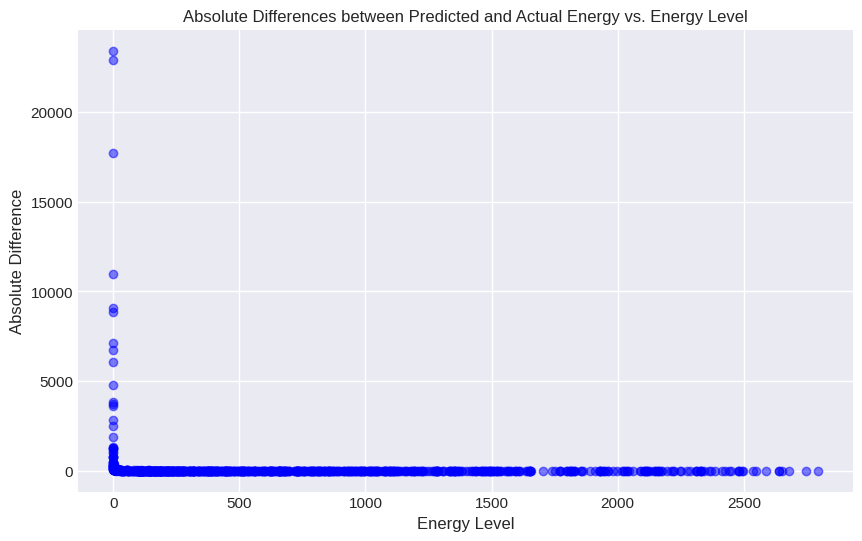

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the absolute differences between y_pred_knn and y_test
absolute_differences = abs(y_pred_knn - y_test)/y_test

# Create a DataFrame with energy and absolute differences
data = pd.DataFrame({'Energy': y_test, 'Absolute Difference': absolute_differences})

# Sort the data by energy
data_sorted = data.sort_values(by='Energy')

# Plotting
plt.figure(figsize=(10, 6))

# Plot absolute differences against energy
plt.scatter(data_sorted['Energy'], data_sorted['Absolute Difference'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Absolute Differences between Predicted and Actual Energy vs. Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Absolute Difference')

# Show plot
plt.grid(True)
plt.show()


       Energy  Percentage Difference
3827   977.91              36.702354
3828  1191.99               8.793320
3829   795.88              32.871936
3830   141.05             728.784479
3831  1124.20              36.413824


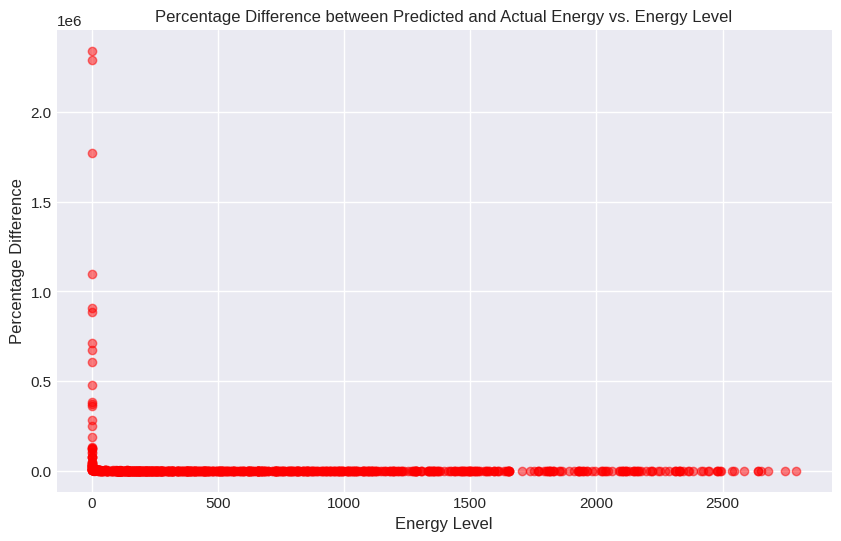

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the absolute differences between y_pred and y_test
absolute_differences = abs(y_pred_knn - y_test)

# Calculate the percentage of the absolute difference relative to the total energy
percentage_difference = (absolute_differences / y_test) * 100

# Create a DataFrame with energy and percentage difference
data_percentage = pd.DataFrame({'Energy': y_test, 'Percentage Difference': percentage_difference})

print(data_percentage.head())

# Sort the data by energy
data_percentage_sorted = data_percentage.sort_values(by='Energy')

# Plotting
plt.figure(figsize=(10, 6))

# Plot percentage difference against energy
plt.scatter(data_percentage_sorted['Energy'], data_percentage_sorted['Percentage Difference'], color='red', alpha=0.5)

# Add labels and title
plt.title('Percentage Difference between Predicted and Actual Energy vs. Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Percentage Difference')

# Show plot
plt.grid(True)
plt.show()


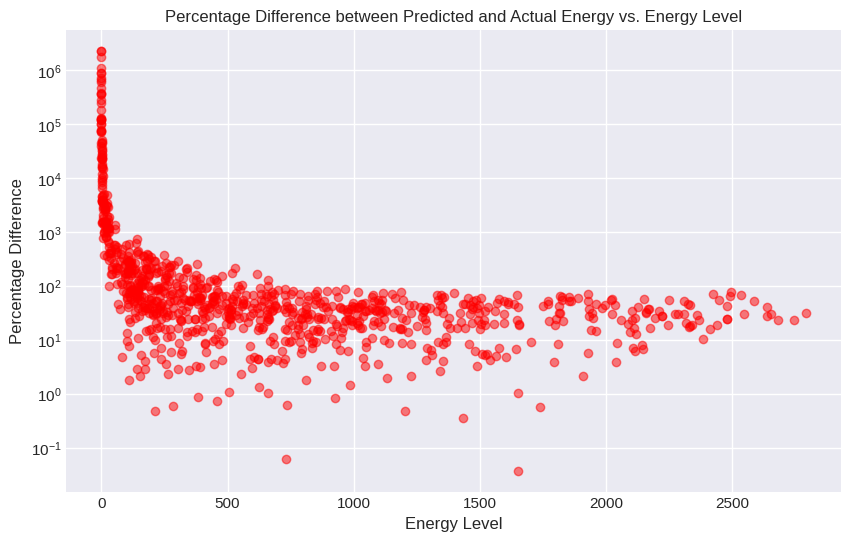

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot percentage difference against energy with logarithmic scale on y-axis
plt.scatter(data_percentage_sorted['Energy'], data_percentage_sorted['Percentage Difference'], color='red', alpha=0.5)

# Apply logarithmic scale to y-axis
plt.yscale('log')

# Add labels and title
plt.title('Percentage Difference between Predicted and Actual Energy vs. Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Percentage Difference')

# Show plot
plt.grid(True)
plt.show()


Ahora filtramos los outliers

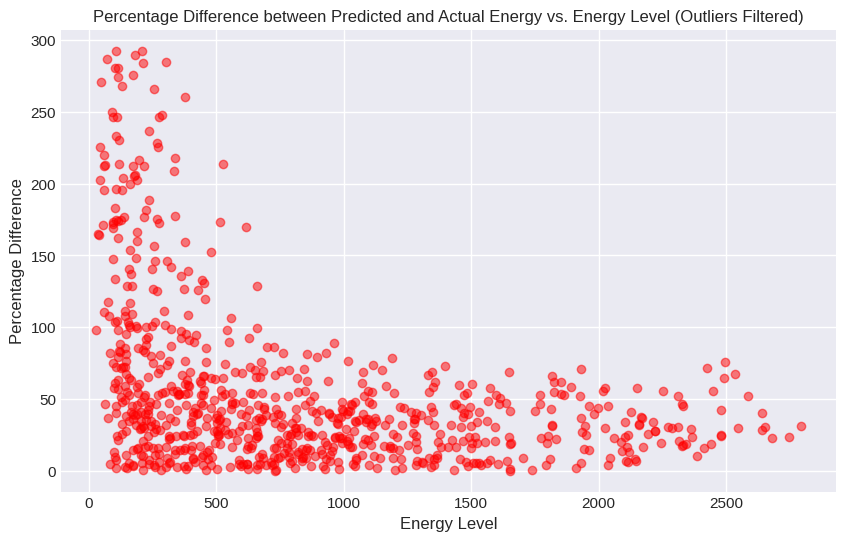

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the IQR for 'Percentage Difference' column
Q1 = data_percentage_sorted['Percentage Difference'].quantile(0.25)
Q3 = data_percentage_sorted['Percentage Difference'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
threshold = 1.5 * IQR

# Filter outliers
filtered_data = data_percentage_sorted[
    (data_percentage_sorted['Percentage Difference'] >= Q1 - threshold) &
    (data_percentage_sorted['Percentage Difference'] <= Q3 + threshold)
]

# Plotting
plt.figure(figsize=(10, 6))

# Plot percentage difference against energy with logarithmic scale on y-axis
plt.scatter(filtered_data['Energy'], filtered_data['Percentage Difference'], color='red', alpha=0.5)

# Add labels and title
plt.title('Percentage Difference between Predicted and Actual Energy vs. Energy Level (Outliers Filtered)')
plt.xlabel('Energy Level')
plt.ylabel('Percentage Difference')

# Show plot
plt.grid(True)
plt.show()


Cálculo de error para las energías bajas y altas

In [ ]:
# Calculate the third quantile (75th percentile) of the energy values
energy_threshold = filtered_data['Energy'].quantile(0.75)

# Calculate the error for high and low values of energy
low_energy_error = filtered_data.loc[filtered_data['Energy'] < energy_threshold, 'Percentage Difference'].mean()
high_energy_error = filtered_data.loc[filtered_data['Energy'] >= energy_threshold, 'Percentage Difference'].mean()

# Round the error values to three decimals
low_energy_error_rounded = round(low_energy_error, 3)
high_energy_error_rounded = round(high_energy_error, 3)

# Print the error for low and high energy values with three decimals
print("Average Percentage Difference for Low Energy Values:", low_energy_error_rounded, "%")
print("Average Percentage Difference for High Energy Values:", high_energy_error_rounded,"%")


Average Percentage Difference for Low Energy Values: 64.097 %
Average Percentage Difference for High Energy Values: 30.13 %


Entrenamos el modelo con todo el conjunto de datos

In [ ]:
knn_bayesian_search.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('knn', KNeighborsRegressor())]),
              scoring='neg_root_mean_squared_error',
              search_spaces={'knn__algorithm': Categorical(categories=('auto', 'ball_tree', 'kd_tree', 'brute'), prior=None),
                             'knn__leaf_size': Integer(low=10, hi...form='normalize'),
                             'knn__metric': Categorical(categories=('euclidean', 'manhattan', 'chebyshev', 'minkowski'), prior=None),
                             'knn__n_neighbors': Integer(low=1, high=60, prior='uniform', transform='normalize'),
                             'knn__p': Integer(low=1, high=2, prior='uniform', transform='normalize'),
                             'knn__weights': Categorical(categories=('uniform', 'distance'), prior=None)},
              verbose=1)

Guardamos el modelo en "modelo_final.pkl"

In [ ]:
import joblib

# Save the final model to a file
joblib.dump(knn_bayesian_search, 'modelo_final.pkl')

['modelo_final.pkl']

Se lee el archivo con los datos de competición

In [ ]:
# Load the competition dataset
file_path = '/content/drive/MyDrive/wind_comp.csv'
comp_df = pd.read_csv(file_path)

# Load the trained model
loaded_model = joblib.load('modelo_final.pkl')

Limpiar datos de competición

In [ ]:
# Eliminación de variables meteorológicas no correspondientes a la localización 13
print("Columnas relevantes:")
relevant_columns = [col for col in comp_df.columns if col.endswith(".13")]
X_comp = comp_df[relevant_columns]
print("Número de columnas relevantes: ", len(X_comp.columns))

Columnas relevantes:
Número de columnas relevantes:  22


Se hacen las predicciones y se guardan en Google Drive

In [ ]:
# Make predictions on the competition dataset
predictions = loaded_model.predict(X_comp)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions, columns=['predicted_energy'])

# Specify the directory in your Google Drive where you want to save the file
save_path = '/content/drive/MyDrive/'

# Save the predictions to a CSV file in the specified directory
predictions_df.to_csv(save_path + 'predicciones.csv', index=False)


# Problema de clasificación

## Convertir en problema de clasificación

In [ ]:
third_quantile = df_relevant['energy'].quantile(0.75)
print(third_quantile)

# Asignar clases basadas en el tercer cuartil
#predictions_df['predicted_class'] = np.where(predictions_df['predicted_energy'] < third_quantile, 'low', 'high')
df_relevant['predicted_class'] = np.where(df_relevant['energy'] < third_quantile, 'low', 'high')

1089.375
RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsRegressor())]),
                   n_iter=50, n_jobs=1,
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__leaf_size': [10, 20, 30, 40, 50],
                                        'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'chebyshev',
                                                        'minkowski'],
                                        'knn__metric_params': [None],
                                        'knn__n_jobs': [None],
                                        'knn__n_neig

###Preparar datos para clasificación

In [ ]:
X_class, y_class = df_relevant.drop(columns=['energy', 'predicted_class']), df_relevant['predicted_class']

from sklearn.preprocessing import LabelEncoder

# Encode the string labels into numerical labels One Hot Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_class)

# Dividir los datos
X_train, X_test = X_class.loc[:highest_index_2008], X_class.loc[first_index_2009:]
y_train, y_test = y_encoded[:highest_index_2008 + 1], y_encoded[first_index_2009:]

# Verificación
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3827, 22)
y_train shape: (3827,)
X_test shape: (921, 22)
y_test shape: (921,)


### Volver a elegir escalador??

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
knn_class = Pipeline([
    ('scaler', StandardScaler()),  # Escalador StandardScaler
    ('knn', KNeighborsClassifier())  # Modelo KNN
])

# Definir el espacio de parámetros para GridSearchCV
param_grid_knn_class = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Inicializar GridSearchCV para el modelo de clasificación KNN
knn_class_model = GridSearchCV(knn_class,
                               param_grid_knn_class,
                               scoring='f1',  # Usar f1_weighted para problemas multiclase
                               cv=TimeSeriesSplit(n_splits=3),
                               n_jobs=1,
                               verbose=1)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
knn_class_model.fit(X_train, y_train)
fin = time.time()

# Predecir sobre el conjunto de prueba
y_pred_knn_class = knn_class_model.predict(X_test)

# Calcular el F1 score
f1_knn_class = f1_score(y_test, y_pred_knn_class, average='weighted')

print("F1 Score para KNN Classification:", f1_knn_class)
print("Best parameters:", knn_class_model.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 44 candidates, totalling 132 fits
F1 Score para KNN Classification: 0.8359142276162796
Best parameters: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}
Elapsed time: 11.885751247406006 seconds


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = Pipeline([
    ('scaler', StandardScaler()),  # Escalador StandardScaler
    ('rf', RandomForestClassifier())  # Modelo Random Forest
])

# Define los parámetros de búsqueda de cuadrícula para el Random Forest
param_grid_rf_class = {
    'rf__n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'rf__max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'rf__min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'rf__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para ser una hoja
    'rf__bootstrap': [True, False],  # Método de muestreo de instancias con o sin reemplazo
    'rf__class_weight': ['balanced', None]
}

# Define el modelo de búsqueda de cuadrícula para Random Forest
rf_class_model = BayesSearchCV(rf_class,
                               param_grid_rf_class,
                               scoring='f1',
                               cv=TimeSeriesSplit(n_splits=3),
                               n_jobs=1,
                               verbose=1,
                               n_iter=2)  # ajusta n_iter según tus recursos computacionales

inicio = time.time()
# Entrena el modelo Random Forest con los datos de entrenamiento
rf_class_model.fit(X_train, y_train)
fin = time.time()

# Realiza predicciones sobre el conjunto de prueba
y_pred_rf_class = rf_class_model.predict(X_test)

f1_rf_class = f1_score(y_test, y_pred_rf_class, average='weighted')

print("F1 Score para RandomForest Classification:", f1_rf_class)
print("Best parameters:", rf_class_model.best_params_)
# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
F1 Score para RandomForest Classification: 0.8569958183744251
Best parameters: OrderedDict([('rf__bootstrap', False), ('rf__class_weight', 'balanced'), ('rf__max_depth', None), ('rf__min_samples_leaf', 2), ('rf__min_samples_split', 10), ('rf__n_estimators', 150)])
Elapsed time: 12.889750242233276 seconds


### Decission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate
import time

dt_class = Pipeline([
    ('scaler', StandardScaler()),  # Escalador StandardScaler
    ('dt', DecisionTreeClassifier())  # Modelo Decision Tree Classifier
])

# Define los parámetros de búsqueda de cuadrícula para el Decision Tree Classifier
param_grid_dt_class = {
    'dt__max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima del árbol
    'dt__min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'dt__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para ser una hoja
    'dt__max_features': ['sqrt', 'log2'],  # Número máximo de características a considerar en cada división
    'dt__class_weight': ['balanced', None]  # Peso de clases para manejar el desequilibrio de clase
}

# Inicializar GridSearchCV para el modelo de búsqueda de cuadrícula para Decision Tree Classifier
dt_class_model = GridSearchCV(dt_class,
                              param_grid_dt_class,
                              scoring='f1',  # F1 Score ponderado para problemas multiclase
                              cv=TimeSeriesSplit(n_splits=3),
                              n_jobs=1,
                              verbose=1)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
dt_class_model.fit(X_train, y_train)
fin = time.time()

# Predecir sobre el conjunto de prueba
y_pred_dt_class = dt_class_model.predict(X_test)

# Calcular el F1 score
f1_dt_class = f1_score(y_test, y_pred_dt_class, average='weighted')

print("F1 Score para Decision Tree Classification:", f1_dt_class)
print("Best parameters:", dt_class_model.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 180 candidates, totalling 540 fits
F1 Score para Decision Tree Classification: 0.8221598825093754
Best parameters: {'dt__class_weight': None, 'dt__max_depth': 5, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 5}
Elapsed time: 11.665478944778442 seconds


### SVM Classifier

In [ ]:
from sklearn.svm import SVC
svm_class = Pipeline([
    ('scaler', StandardScaler()),  # Escalador StandardScaler
    ('svm', SVC())  # Modelo SVM Classifier
])

# Define los parámetros de búsqueda de cuadrícula para el SVM Classifier
param_grid_svm_class = {
    'svm__C': [0.1, 1, 10],  # Parámetro de regularización
    'svm__kernel': ['linear', 'rbf'],  # Tipo de kernel
    'svm__gamma': ['scale', 'auto'],  # Coeficiente del kernel para 'rbf', 'poly' y 'sigmoid'
    'svm__class_weight': [None, 'balanced']  # Peso de clases para manejar el desequilibrio de clase
}

# Define el modelo de búsqueda de cuadrícula para SVM Classifier
svm_class_model = GridSearchCV(svm_class,
                               param_grid_svm_class,
                               scoring='f1',
                               cv=TimeSeriesSplit(n_splits=3),
                               n_jobs=1,
                               verbose=1)

# Ajustar el modelo con los datos de entrenamiento
inicio = time.time()
svm_class_model.fit(X_train, y_train)
fin = time.time()
y_pred_svm_class = svm_class_model.predict(X_test)

# Calcular el F1 score
f1_svm_class = f1_score(y_test, y_pred_svm_class, average='weighted')

print("F1 Score para SVM Classification:", f1_svm_class)
print("Best parameters:", svm_class_model.best_params_)

# Calcular el tiempo transcurrido
elapsed_time = fin - inicio
print("Elapsed time:", elapsed_time, "seconds")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
F1 Score para SVM Classification: 0.8593819197158725
Best parameters: {'svm__C': 1, 'svm__class_weight': None, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Elapsed time: 28.817848682403564 seconds


## Elegir mejor modelo

Modelo con mejor métrica es Decision tree

In [ ]:
classifier = dt_class_model.fit(X_class, y_encoded)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


# Uso de ChatGPT

rellenar